In [1]:
%load_ext autoreload
%autoreload 2

# How to use the library

### Import the modules

In [2]:
from src.data import Yahoo
from src.pairing import Pairing
from src.analysis import PairsTradingAnalyzer, StrategyConfig

### Retrieve market data (can take some time)

In [3]:
data_provider = Yahoo()

universe = data_provider.get_universe()
historical_prices = data_provider.get_prices(universe['symbol'].tolist(), '2010-01-01')

### Generate pairs

In [4]:
pairs = Pairing.generate_pairs_by_sector(universe)

### Run the pairing analysis

In [5]:
config = StrategyConfig(MIN_OBSERVATIONS=500, P_VALUE_THRESHOLD=0.05)
analyzer = PairsTradingAnalyzer(prices_df=historical_prices, config=config)

In [6]:
final_results = analyzer.run_batch_analysis(pairs)

2025-11-24 19:14:46,053 - INFO - Processed 10/89. Found 0 candidates.
2025-11-24 19:14:47,526 - INFO - Processed 20/89. Found 0 candidates.
2025-11-24 19:14:48,956 - INFO - Processed 30/89. Found 1 candidates.
2025-11-24 19:14:50,229 - INFO - Processed 40/89. Found 1 candidates.
2025-11-24 19:14:51,864 - INFO - Processed 50/89. Found 5 candidates.
2025-11-24 19:14:53,677 - INFO - Processed 60/89. Found 11 candidates.
2025-11-24 19:14:55,324 - INFO - Processed 70/89. Found 19 candidates.
2025-11-24 19:14:57,941 - INFO - Processed 80/89. Found 23 candidates.


In [ ]:
final_results[final_results['johansen_rank'] > 0].sort_values(by='')

,pair,company1,company2,sector,p_value_EG,beta,half_life_days,hurst,spread_std,johansen_rank,n_obs
19,LR.PA-DG.PA,LR.PA,DG.PA,Industrials,0.00817,0.9783,92.1,NaN,0.12647,1,4069
22,SAF.PA-DG.PA,SAF.PA,DG.PA,Industrials,0.00315,1.3832,100.9,NaN,0.18256,1,4069
16,LR.PA-SAF.PA,LR.PA,SAF.PA,Industrials,0.01685,0.6886,102.3,0.527,0.12480,1,4069
2,AIR.PA-SAF.PA,AIR.PA,SAF.PA,Industrials,0.01944,0.9234,103.3,NaN,0.12876,2,4069
9,EN.PA-DG.PA,EN.PA,DG.PA,Industrials,0.03017,0.5894,104.9,0.499,0.11551,1,4069
5,EN.PA-LR.PA,EN.PA,LR.PA,Industrials,0.01279,0.5665,106.0,0.550,0.14372,1,4069
20,SAF.PA-HO.PA,SAF.PA,HO.PA,Industrials,0.00102,1.0523,109.8,NaN,0.21044,2,4069
6,EN.PA-SAF.PA,EN.PA,SAF.PA,Industrials,0.00857,0.3969,110.0,0.509,0.14942,1,4069
4,AIR.PA-DG.PA,AIR.PA,DG.PA,Industrials,0.01803,1.2828,127.3,NaN,0.20159,1,4069
3,AIR.PA-HO.PA,AIR.PA,HO.PA,Industrials,0.00945,0.9752,134.8,NaN,0.22539,2,4069


with :

- p_value_EG: significance level from the Engle-Granger test ( <0.05 means statistically significant evident that the two assets move together in the long run)
- beta: optimal hedge ratio, amount of the second asset to hedge a long position in the first asset to be market-neutral
- half_life_days: number of days required for the spread to revert halfway to its historical mean
- hurst: if below 0.5 confirms the spread exhibits mean-reverting behavior rather than a random walk
- johansen_rank: if >1 confirms that a cointegration relationship exists

------------------------------
Backtest Results: AIR.PA vs HO.PA
------------------------------
Annualized Return   : -8.52%
Annualized Volatility: 21.34%
Sharpe Ratio        : -0.40
Calmar Ratio        : -0.10
Max Drawdown        : -82.16%
Win Rate            : 39.02%
Profit Factor       : 0.73
Total Trades        : 41
------------------------------


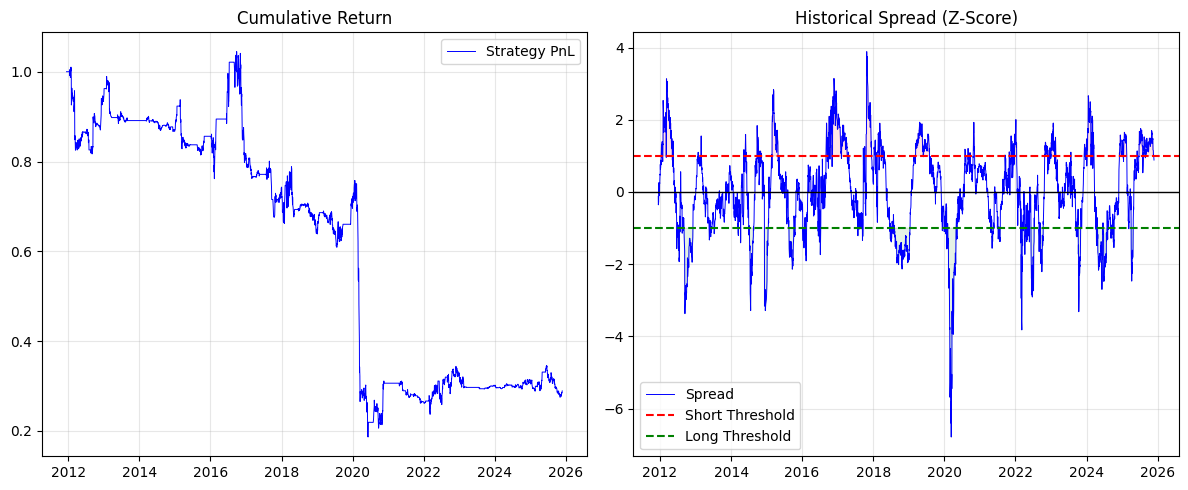

In [22]:
analyzer.backtest_pair(ticker1='AIR.PA', ticker2='HO.PA')